In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from skimage.measure import label
from skimage import morphology

In [3]:
path = "/Users/christian/Nextcloud/06_students/SHK/SHK_Lars_Kleinkop/exchange/200_10-layer/volumes/01/rand_subvolume"


vol_file = "160_10-layer_00_uint8_0460-0690_0690-0920.nrrd"
seg_file = "160_10-layer_00_predictions_0460-0690_0690-0920.pred24_02_14.seg.nrrd"
assert os.path.exists(os.path.join(path,vol_file)) and os.path.exists(os.path.join(path,seg_file))

In [4]:
vol , header = nrrd.read(os.path.join(path,vol_file))
seg , header_seg = nrrd.read(os.path.join(path,seg_file))

In [5]:
print(vol.dtype)
print(vol.nbytes/1024**2)
print(vol.shape)

print(seg.dtype)
print(seg.nbytes/1024**2)
print(seg.shape)

uint8
25.224685668945312
(500, 230, 230)
float32
100.89874267578125
(500, 230, 230)


In [69]:
print(header_seg)

OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([600, 256, 256])), ('space directions', array([[0.020618, 0.      , 0.      ],
       [0.      , 0.020618, 0.      ],
       [0.      , 0.      , 0.020618]])), ('kinds', ['domain', 'domain', 'domain']), ('encoding', 'gzip'), ('space origin', array([ 0.      , 36.947456, 18.473728])), ('Segment0_Color', '0.0862745 0.211765 0.435294'), ('Segment0_ColorAutoGenerated', '0'), ('Segment0_Extent', '188 471 0 255 0 72'), ('Segment0_ID', 'Segment_1'), ('Segment0_LabelValue', '1'), ('Segment0_Layer', '0'), ('Segment0_Name', 'weft'), ('Segment0_NameAutoGenerated', '0'), ('Segment0_Tags', 'Segmentation.Status:inprogress|TerminologyEntry:Segmentation category and type - 3D Slicer General Anatomy list~SCT^85756007^Tissue~SCT^85756007^Tissue~^^~Anatomic codes - DICOM master list~^^~^^|'), ('Segment1_Color', '0.870588 0.788235 0.341176'), ('Segment1_ColorAutoGenerated', '0'), ('Segment1_Exte

In [56]:
seg = seg.transpose(2,0,1)

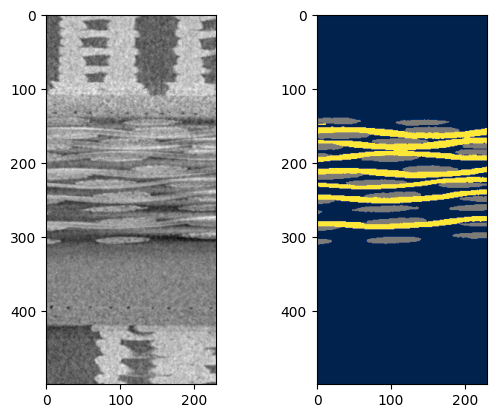

In [13]:
fig, axs = plt.subplots(1,2)

slice = 229
axs[0].imshow(vol[:,:,slice],cmap="gray")
axs[1].imshow(seg[:,:,slice],cmap="cividis")

In [14]:
obj_ids = np.unique(seg)
obj_ids = obj_ids[0:]
masks = seg == obj_ids[:, None, None, None]


print(masks.shape)

(3, 500, 230, 230)


In [15]:
labels = label(seg == 1,connectivity=1)
print(labels.shape)

(500, 230, 230)


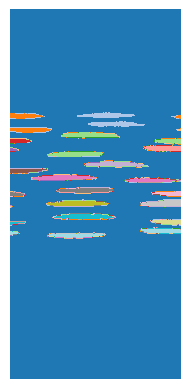

In [16]:
plt.imshow(labels[:,:,0] ,cmap="tab20")
plt.axis("off");

In [35]:
out = {}
out["raw"] = vol[:,:,:slice].transpose(0,1,2)
out["mask"] = seg[:,:,:slice].astype(np.int16).transpose(0,1,2)
out['masks'] = masks[:,:,:,:slice].transpose(0,1,2,3)

In [36]:
for name, item in out.items():
    print(name,item.shape,item.dtype)

raw (500, 230, 229) uint8
mask (500, 230, 229) int16
masks (3, 500, 230, 229) bool


In [37]:
fout = fout = os.path.splitext(vol_file)[0] + ".seg.h5"

with h5py.File(fout, 'w') as fout:
    
    for key,item in out.items():
        fout.create_dataset(key, data = item,compression="gzip")